In [16]:
import pandas as pd
import os
import glob
from tqdm import tqdm
import shutil

In [18]:
df = pd.DataFrame(columns = ['class', 'filename'])

In [22]:
df['files'] = glob.glob("edible_plants/*/*.jpg")

In [23]:
df['class'] = df['files'].apply(lambda x: x.split('/')[1])

In [24]:
df['filename'] = df['files'].apply(lambda x: x.split('/')[2])

In [25]:
df.head()

,class,filename,files
0,asiatic dayflower,19. commelina_communis_l1.jpg,edible_plants/ asiatic dayflower/19. commelina...
1,asiatic dayflower,40. dayflower-creamed-sm.jpg,edible_plants/ asiatic dayflower/40. dayflower...
2,asiatic dayflower,91. asiatic-dayflower.jpg,edible_plants/ asiatic dayflower/91. asiatic-d...
3,asiatic dayflower,6. 220px-c.communis_after_rain.jpg,edible_plants/ asiatic dayflower/6. 220px-c.co...
4,asiatic dayflower,8. dayflowerasiatic01.jpg,edible_plants/ asiatic dayflower/8. dayflowera...


In [24]:
len(df)

6111

In [26]:
df.groupby(['class']).size().reset_index(name = 'count').sort_values(['count'], ascending = 1).head()

,class,count
20,greenbrier,86
60,wintergreen,87
47,sheep sorrel,87
31,milkweed,88
38,pickerelweed,88


In [26]:
def get_class(files):
    file_class = files.split('/')[1].strip().replace(' ','_')
    file_name = files.split('/')[2].strip().replace(' ','_')
    return pd.Series({'class': file_class, 'filename': file_name})

In [27]:
df[['class','filename']] = df['files'].apply(get_class)

In [28]:
df.tail()

,class,filename,files
6106,dandelion,88._dandelion-bess_1024x1024.jpg,edible_plants/ dandelion/88. dandelion-bess_10...
6107,dandelion,36._photo-1496867557017-559adb93b339?ixlib=rb-...,edible_plants/ dandelion/36. photo-14968675570...
6108,dandelion,68._sauteed-dandelion-greens.jpg,edible_plants/ dandelion/68. sauteed-dandelion...
6109,dandelion,11._photo-1507644980989-d116ca3c5d89?ixlib=rb-...,edible_plants/ dandelion/11. photo-15076449809...
6110,dandelion,43._0011.jpg,edible_plants/ dandelion/43. 0011.jpg


In [ ]:
shutil.rmtree()

In [42]:
categories = df['class'].unique()

array(['asiatic_dayflower', 'curly_dock', 'bergamot', 'amaranth',
       "lady's_thumb", 'purslane', 'wild_ginger', 'sumac', 'currant',
       'watercress', 'mayapple', 'field_garlic', 'chicory', 'wapato',
       'cow_parsnip', 'wood_sorrel', 'pokeweed', 'trout_lily',
       'pickerelweed', 'quickweed', "queen_anne's_lace", 'parsnip',
       'spicebush', 'oxeye_daisy', 'salsify', 'greenbrier', 'daylily',
       'hopniss', 'burdock', "false_solomon's_seal", 'new_england_aster',
       'hawthorn', 'chickweed', 'wineberry', 'garlic_mustard',
       'honeywort', 'common_mallow', 'goutweed', 'shiso',
       "lamb's_quarters", 'silverberry', 'pineappleweed', 'peppergrass',
       'frangrant_sumac', 'plantain', 'elderberry', 'milkweed', 'mugwort',
       'yarow', 'wintergreen', 'beebalm', 'epazote', 'jewelewee',
       'nettle', "shepherd's_purse", 'sheep_sorrel', 'sow_thistle',
       'juniper', 'juneberry', 'evening_primrose', 'melilot', 'thistle',
       'henbit', 'jerusalem_artichoke', 's

In [ ]:
shutil.copy(f)

In [54]:
def rename_files(df, dest_dir ="processed"):
    shutil.rmtree(dest_dir, ignore_errors= True)
    os.makedirs(dest_dir, exist_ok= True)
    for i in tqdm(df['class'].unique()):
        os.makedirs(f"{dest_dir}/{i}")
    df.apply(lambda x: shutil.copy(x['files'], f"{dest_dir}/{x['class']}/{x['filename']}"), axis =1)
        
        

   

In [55]:
rename_files(df, dest_dir ="processed") 

100%|██████████| 66/66 [00:00<00:00, 24981.87it/s]


In [57]:
!pip install fastai

    100% |████████████████████████████████| 122kB 3.1MB/s ta 0:00:01


In [87]:
import fastai
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from glob import glob
import pandas as pd
#import helper
from tqdm import tqdm
import hashlib
from urllib import request

In [3]:

%%matplotlibmatplotl  inline
%load_ext autoreload

%autoreload 2

%%reload_extreload_e  autoreload


UsageError: Cell magic `%%matplotlibmatplotl` not found.


In [6]:

PATH  =  "processed/"

In [7]:

??ImageClassifierDataImageCla .from_paths

Object `ImageClassifierDataImageCla` not found.


In [8]:
!rm -rf data/tmp

In [91]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## create train and test sets

In [35]:
df['file_path'] = df.apply(lambda x: f"processed/{x['class']}/{x['filename']}", axis = 1)

In [44]:
df['file_path_short'] = df.apply(lambda x: f"{x['class']}/{x['filename']}", axis = 1)

In [92]:
df.head()

,class,filename,files,file_path,file_path_short
0,asiatic_dayflower,19._commelina_communis_l1.jpg,edible_plants/ asiatic dayflower/19. commelina...,processed/asiatic_dayflower/19._commelina_comm...,asiatic_dayflower/19._commelina_communis_l1.jpg
1,asiatic_dayflower,40._dayflower-creamed-sm.jpg,edible_plants/ asiatic dayflower/40. dayflower...,processed/asiatic_dayflower/40._dayflower-crea...,asiatic_dayflower/40._dayflower-creamed-sm.jpg
2,asiatic_dayflower,91._asiatic-dayflower.jpg,edible_plants/ asiatic dayflower/91. asiatic-d...,processed/asiatic_dayflower/91._asiatic-dayflo...,asiatic_dayflower/91._asiatic-dayflower.jpg
3,asiatic_dayflower,6._220px-c.communis_after_rain.jpg,edible_plants/ asiatic dayflower/6. 220px-c.co...,processed/asiatic_dayflower/6._220px-c.communi...,asiatic_dayflower/6._220px-c.communis_after_ra...
4,asiatic_dayflower,8._dayflowerasiatic01.jpg,edible_plants/ asiatic dayflower/8. dayflowera...,processed/asiatic_dayflower/8._dayflowerasiati...,asiatic_dayflower/8._dayflowerasiatic01.jpg


In [95]:
def is_valid(x):
    try:
        plt.imread(x)
        return 1
    except:
        return 0

In [96]:
df['is_corrupt'] = df['files'].apply(lambda x: is_valid(x))

In [98]:
df.is_corrupt.value_counts()

1    6062
0      49
Name: is_corrupt, dtype: int64

In [99]:
df_val = df.loc[df['is_corrupt']==1]

In [45]:
ydata = df['class']

In [53]:
xdata = df[['file_path', 'file_path_short', 'class', 'filename']]

In [54]:
test = '19._commelina_communis_l1.jpg'

,class,filename,files,file_path,file_path_short
0,asiatic_dayflower,19._commelina_communis_l1.jpg,edible_plants/ asiatic dayflower/19. commelina...,processed/asiatic_dayflower/19._commelina_comm...,asiatic_dayflower/19._commelina_communis_l1.jpg
1,asiatic_dayflower,40._dayflower-creamed-sm.jpg,edible_plants/ asiatic dayflower/40. dayflower...,processed/asiatic_dayflower/40._dayflower-crea...,asiatic_dayflower/40._dayflower-creamed-sm.jpg
2,asiatic_dayflower,91._asiatic-dayflower.jpg,edible_plants/ asiatic dayflower/91. asiatic-d...,processed/asiatic_dayflower/91._asiatic-dayflo...,asiatic_dayflower/91._asiatic-dayflower.jpg
3,asiatic_dayflower,6._220px-c.communis_after_rain.jpg,edible_plants/ asiatic dayflower/6. 220px-c.co...,processed/asiatic_dayflower/6._220px-c.communi...,asiatic_dayflower/6._220px-c.communis_after_ra...
4,asiatic_dayflower,8._dayflowerasiatic01.jpg,edible_plants/ asiatic dayflower/8. dayflowera...,processed/asiatic_dayflower/8._dayflowerasiati...,asiatic_dayflower/8._dayflowerasiatic01.jpg


In [100]:
X_train1, X_test1= train_test_split(df_val, test_size = 0.2, random_state = 1)

In [76]:
X_train1.head()

,class,filename,files,file_path,file_path_short
1102,field_garlic,48._allium-oleraceum-ha-jvilchez1.jpg,edible_plants/ field garlic/48. allium-olerace...,processed/field_garlic/48._allium-oleraceum-ha...,field_garlic/48._allium-oleraceum-ha-jvilchez1...
329,amaranth,55._f31-2.jpg,edible_plants/amaranth/55. f31-2.jpg,processed/amaranth/55._f31-2.jpg,amaranth/55._f31-2.jpg
2271,salsify,34._frozen-salsify.jpg,edible_plants/ salsify/34. frozen-salsify.jpg,processed/salsify/34._frozen-salsify.jpg,salsify/34._frozen-salsify.jpg
1947,queen_anne's_lace,6._81qujqa9ztl._sx425_.jpg,edible_plants/ queen anne's lace/6. 81qujqa9zt...,processed/queen_anne's_lace/6._81qujqa9ztl._sx...,queen_anne's_lace/6._81qujqa9ztl._sx425_.jpg
5266,sow_thistle,25._prickly_sowthistle.jpg,edible_plants/ sow thistle/25. prickly_sowthis...,processed/sow_thistle/25._prickly_sowthistle.jpg,sow_thistle/25._prickly_sowthistle.jpg


In [77]:
#copy files into train and validation folders
def create_train_set(df, dest_dir):
    shutil.rmtree(dest_dir, ignore_errors= True)
    os.makedirs(dest_dir, exist_ok= True)
    for i in tqdm(df['class'].unique()):
        os.makedirs(f"{dest_dir}/{i}")
    df.apply(lambda x: shutil.copy(x['files'], f"{dest_dir}/{x['file_path_short']}"), axis = 1)

In [101]:
create_train_set(X_train1, dest_dir = "model/train")


100%|██████████| 66/66 [00:00<00:00, 14857.45it/s]

In [102]:
create_train_set(X_test1, dest_dir = "model/valid")


100%|██████████| 66/66 [00:00<00:00, 12725.79it/s]

In [81]:

def  get_dataget_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on,
                           max_zoom=1.1)
    data = ImageClassifierData.from_paths(path='model'
            , num_workers=8
            , tfms=tfms, bs=bs)
    #return data.resize(sz, 'tmp')
    return data if sz>300 else data.resize(340, 'tmp')

In [82]:
sz = 224 # size of image
arch = resnet50 #model architecture.. model has 101 layers
bs=32 # batch size; number of images to process at one time

In [88]:
??ConvLearnerConvLear.pretrained

Object `ConvLearnerConvLear.pretrained` not found.


In [120]:
!rm -rf model/tmp

In [121]:

data  = get_dataget_data(sz, bs)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(lrs=1e-2, n_cycle=10)

 43%|████▎     | 2089/4849 [00:51<01:08, 40.51it/s]

/home/stephanie.gline/anaconda3/envs/fastai/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


100%|██████████| 38/38 [00:10<00:00,  3.72it/s]


epoch      trn_loss   val_loss   accuracy                   
    0      2.712548   2.062063   0.502061  
    1      1.902543   1.79448    0.549876                   
    2      1.552643   1.686865   0.572135                   
    3      1.312218   1.620974   0.588623                   
    4      1.129046   1.647902   0.596043                   
    5      1.017134   1.641053   0.591096                    
    6      0.865157   1.638805   0.600165                    
    7      0.76287    1.671709   0.58615                     
    8      0.686312   1.684772   0.597692                    
    9      0.605161   1.692239   0.603462                    


[array([1.69224]), 0.6034624890070363]

In [122]:
learn.precompute = False
learn.fit(lrs=1e-2, n_cycle=5, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                   
    0      1.082711   1.662239   0.619951  
    1      1.057926   1.67345    0.601814                   
    2      1.048219   1.649564   0.604287                   
    3      0.968217   1.636936   0.618302                    
    4      0.990769   1.64846    0.611707                    


[array([1.64846]), 0.6117065126308212]

In [123]:

learn.unfreeze()

In [124]:
lr=1e-2
lr=np.array([lr/18,lr/6,lr/2])

In [125]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.590955   1.55215    0.621599  
    1      1.310525   1.440945   0.645507                   
    2      0.772209   1.294079   0.682605                    
    3      0.930257   1.373822   0.669415                    
    4      0.641344   1.301648   0.694971                    
    5      0.40002    1.243502   0.718879                    
    6      0.31853    1.22755    0.708986                    


[array([1.22755]), 0.7089859844728236]

In [126]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy_np(preds,y))

(1.113683477496236, 0.72959604286892)

In [127]:
predicted_class = np.argmax(preds, axis=1)
confidence = np.max(preds, axis=1)

In [128]:
predictions_df = pd.DataFrame ({'actual': y, 'pred': predicted_class,'image':learn.data.val_ds.fnames,'conf':confidence})

In [130]:
predictions_df['actual_class'] = predictions_df['actual'].apply(lambda x : data.classes[x])
predictions_df['pred_class'] = predictions_df['pred'].apply(lambda x : data.classes[x])

In [133]:
predictions_df.head()

,actual,pred,image,conf,actual_class,pred_class
0,0,0,valid/amaranth/82._65ab3932d9845758.jpg,0.999997,amaranth,amaranth
1,0,52,valid/amaranth/35._amaranth-leaves-500x500.jpg,0.998498,amaranth,shiso
2,0,0,valid/amaranth/2._amaranth-nutrition-facts.jpg,0.999799,amaranth,amaranth
3,0,0,valid/amaranth/31._opopeofinal.jpg,0.999917,amaranth,amaranth
4,0,0,valid/amaranth/73._illumination-amaranth-x__38...,0.812320,amaranth,amaranth


In [134]:
def predict_class(image_path):
    trn_tfms, val_tfms = tfms_from_model(arch, sz)
    im = val_tfms(np.array(open_image(image_path)))

    preds = learn.predict_array(im[None])
    class_idx = np.argmax(preds)
    print(data.classes[class_idx],np.max(preds))
    
    img = PIL.Image.open(image_path);
    #return img
    
    return helper.get_top_n_predictions(np.exp(preds), data.classes)
    #return np.argmax(preds)

def predict_class_web(url,ext="jpg"):
    url_hash = hashlib.md5(url.encode('utf-8')).hexdigest()
    file_name = f'data/downloaded/{url_hash}.{ext}'
    f = open(file_name, 'wb')
    f.write(request.urlopen(url).read())
    f.close()
    
    return predict_class(file_name)

In [135]:
labels = learn.data.classes
cm = confusion_matrix(predictions_df['actual'], predictions_df['pred'])

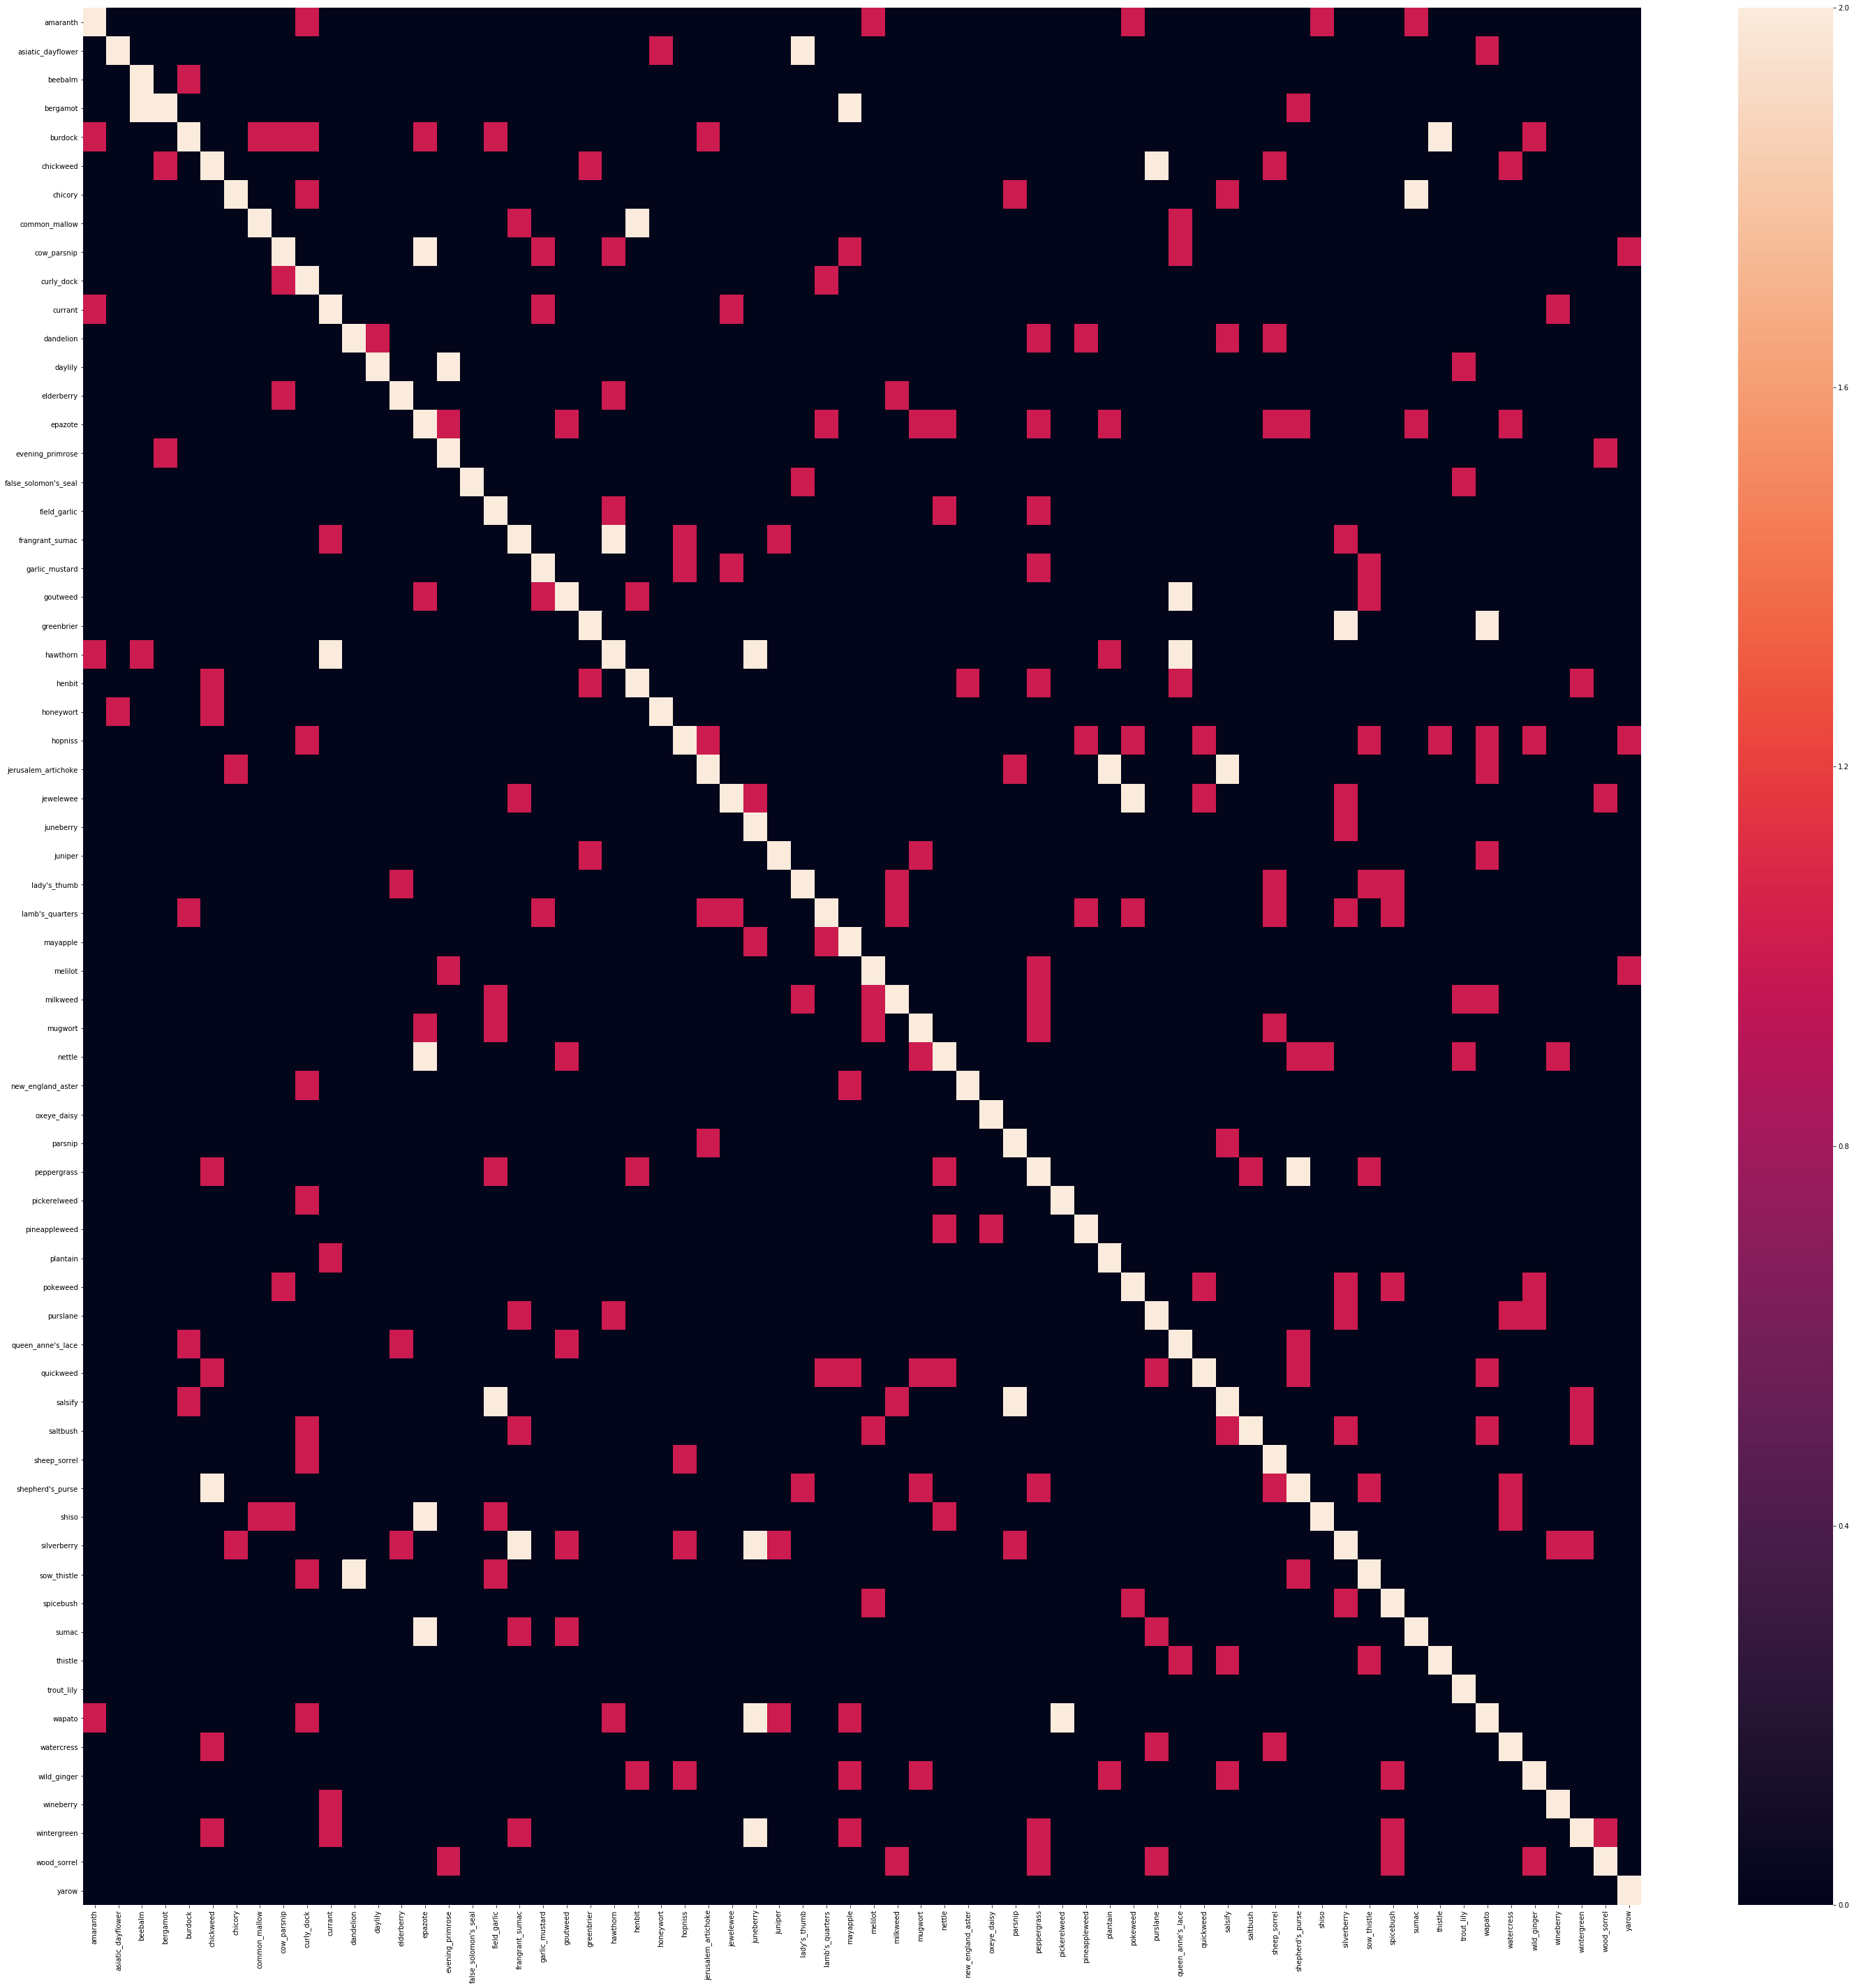

In [136]:
fig, ax = plt.subplots(figsize=(50, 50))
_ = sns.heatmap(cm, ax=ax, yticklabels=labels, xticklabels=labels, robust=True)

In [142]:
!wget https://1rxbfb2hflyo2jt6jd3f6sjr-wpengine.netdna-ssl.com/wp-content/uploads/2015/11/HR1156-Red-Perilla-IMG_6079-510x600.jpg

--2018-08-10 23:09:44--  https://1rxbfb2hflyo2jt6jd3f6sjr-wpengine.netdna-ssl.com/wp-content/uploads/2015/11/HR1156-Red-Perilla-IMG_6079-510x600.jpg
Resolving 1rxbfb2hflyo2jt6jd3f6sjr-wpengine.netdna-ssl.com (1rxbfb2hflyo2jt6jd3f6sjr-wpengine.netdna-ssl.com)... 94.31.29.96
Connecting to 1rxbfb2hflyo2jt6jd3f6sjr-wpengine.netdna-ssl.com (1rxbfb2hflyo2jt6jd3f6sjr-wpengine.netdna-ssl.com)|94.31.29.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54408 (53K) [image/jpeg]
Saving to: ‘HR1156-Red-Perilla-IMG_6079-510x600.jpg’

HR1156-Red-Perilla- 100%[===================>]  53.13K  --.-KB/s    in 0.06s   

2018-08-10 23:09:44 (881 KB/s) - ‘HR1156-Red-Perilla-IMG_6079-510x600.jpg’ saved [54408/54408]



TypeError: Image data cannot be converted to float

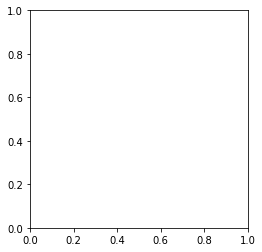

In [145]:
plt.imshow('HR1156-Red-Perilla-IMG_6079-510x600.jpg')

In [148]:
!wget https://raw.githubusercontent.com/stephgline/fastai_bird_image_recognition/master/training/helper.py

--2018-08-10 23:12:34--  https://raw.githubusercontent.com/stephgline/fastai_bird_image_recognition/master/training/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1044 (1.0K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   1.02K  --.-KB/s    in 0s      

2018-08-10 23:12:34 (202 MB/s) - ‘helper.py’ saved [1044/1044]



In [151]:
import helper
url="https://2.bp.blogspot.com/-mPiwGK7yddc/Tq4QwEEDUqI/AAAAAAAAFPY/4k5g9LFUArg/s320/Shiso_comp+up+09132011_comp2.jpg"
predict_class_web(url)

daylily -1.3313041


[('shiso', 0.18323125),
 ('daylily', 0.2641326),
 ('juniper', 0.14443047),
 ('amaranth', 0.1301215),
 ('new_england_aster', 0.07868516)]

In [139]:
!mkdir data/downloaded